# Importing the libraries

In [55]:
import numpy as np
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
!pip install ibm_watson_machine_learning

# Reading the dataset


In [66]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='g1IDqsEFOzpgPkIIAaKTQN61e3iSsW6bmIlqLruc1oE4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'customermodeldeployment-donotdelete-pr-95uwaji0d4dfmd'
object_key = 'water_data1.txt'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']
data = pd.read_csv(streaming_body_1)

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [67]:
data.tail()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003
1990,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29,7.6,110,5.7,1.1,NAN,NAN,546,2003


In [68]:
data.shape

(1991, 12)

In [69]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

# Handling missing values

In [71]:
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [72]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [73]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [74]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [75]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [76]:
data['Temp'].fillna(data['Temp'].mean(),inplace=True)
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].mean(),inplace=True)
data['PH'].fillna(data['PH'].mean(),inplace=True)
data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean(),inplace=True)
data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [77]:
data.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [78]:
data=data.rename(columns = {'D.O. (mg/l)': 'do'})
data=data.rename(columns = {'CONDUCTIVITY (µmhos/cm)': 'co'})
data=data.rename(columns = {'B.O.D. (mg/l)': 'bod'})
data=data.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l)': 'na'})
data=data.rename(columns = {'TOTAL COLIFORM (MPN/100ml)Mean': 'tc'})
data=data.rename(columns = {'STATION CODE': 'station'})
data=data.rename(columns = {'LOCATIONS': 'location'})
data=data.rename(columns = {'STATE': 'state'})
data=data.rename(columns = {'PH': 'ph'})

# water quality index calculation

In [79]:
#calculation of pH
data['npH']=data.ph.apply(lambda x: (100 if(8.5>=x>=7)
                                else(80 if(8.6>=x>=8.5) or (6.9>=x>=6.8)
                                  else (60 if(8.8>=x>=8.6) or (6.8>=x>=6.7)
                                      else(40 if(9>=x>=8.8) or (6.7>=x>=6.5)
                                          else 0)))))

In [80]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x: (100 if(x>=6)
                                else(80 if(6>=x>=5.1)
                                  else (60 if(5>=x>=4.1)
                                      else(40 if(4>=x>=3)
                                          else 0)))))


In [81]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x: (100 if(5>=x>=0)
                                else(80 if(50>=x>=5)
                                  else (60 if(500>=x>=50)
                                      else(40 if(10000>=x>=500)
                                          else 0)))))

In [82]:
#calculation of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if(3>=x>=0)
                                else(80 if(6>=x>=3)
                                  else (60 if(80>=x>=6)
                                      else(40 if(125>=x>=80)
                                          else 0)))))


In [83]:
#calculation of electric conductivity
data['nec']=data.co.apply(lambda x:(100 if(75>=x>=0)
                                else(80 if(150>=x>=75)
                                  else (60 if(225>=x>=150)
                                      else(40 if(300>=x>=225)
                                          else 0)))))


In [84]:
#calculation of nitrate
data['nna']=data.na.apply(lambda x:(100 if(20>=x>=0)
                                else(80 if(50>=x>=20)
                                  else (60 if(100>=x>=50)
                                      else(40 if(200>=x>=100)
                                          else 0)))))

In [85]:
#Calculation of Water Quality Index WQI
data['wph']=data.npH*0.165
data['wdo']=data.ndo*0.281
data['wbdo']=data.nbdo*0.234
data['wec']=data.nec*0.009
data['wna']=data.nna*0.028
data['wco']=data.nco*0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco
data

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [86]:
#calculation overall wqi for each year
overall_wqi=data.groupby('year')['wqi'].mean()
overall_wqi.head()

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
Name: wqi, dtype: float64

In [87]:
data1=overall_wqi.reset_index(level=0,inplace=False)
data1

,year,wqi
0,2003,66.239545
1,2004,61.290000
2,2005,73.762689
3,2006,72.909714
4,2007,74.233000
5,2008,73.506289
6,2009,74.456685
7,2010,75.454787
8,2011,76.666580
9,2012,79.496712


# data visualization

In [88]:
#visualizing the filttered data
year=data1['year'].values
AQI=data1['wqi'].values
data1['wqi']=pd.to_numeric(data1['wqi'],errors='coerce')
data1['year']=pd.to_numeric(data1['year'],errors='coerce')


/tmp/wsuser/ipykernel_165/1697775150.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


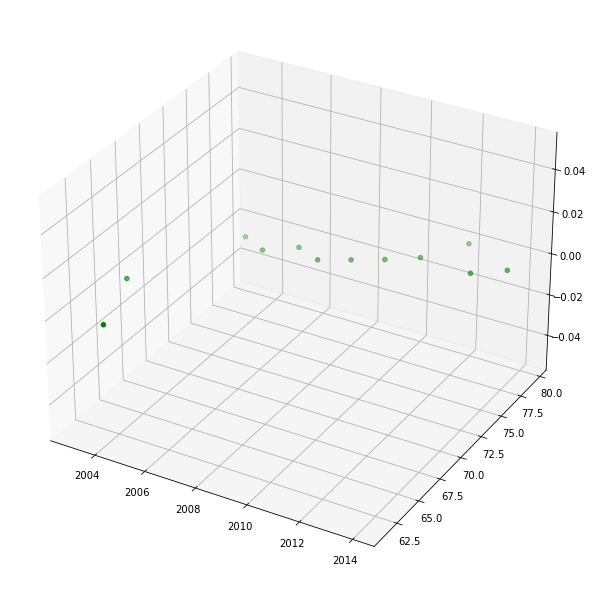

In [89]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 8.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='green')
plt.show()

In [90]:
data1 = data1[np.isfinite(data1['wqi'])]
data1.head()

,year,wqi
0,2003,66.239545
1,2004,61.290000
2,2005,73.762689
3,2006,72.909714
4,2007,74.233000


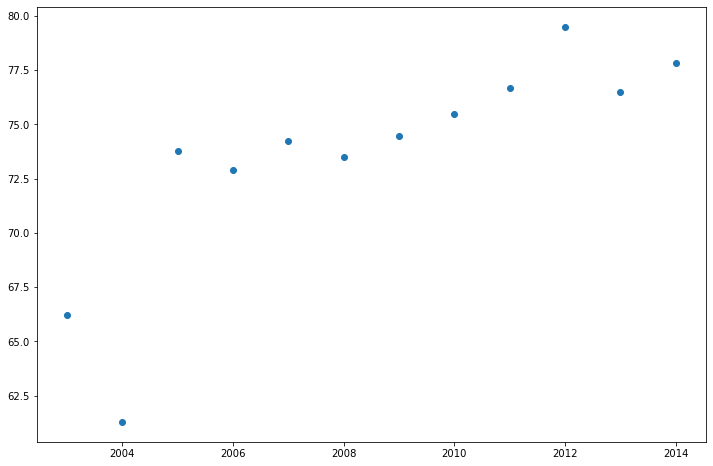

In [91]:
#scatter plot of data points
cols =['year']
x=data1[cols]
y = data1['wqi']
plt.scatter(x,y)
plt.show()

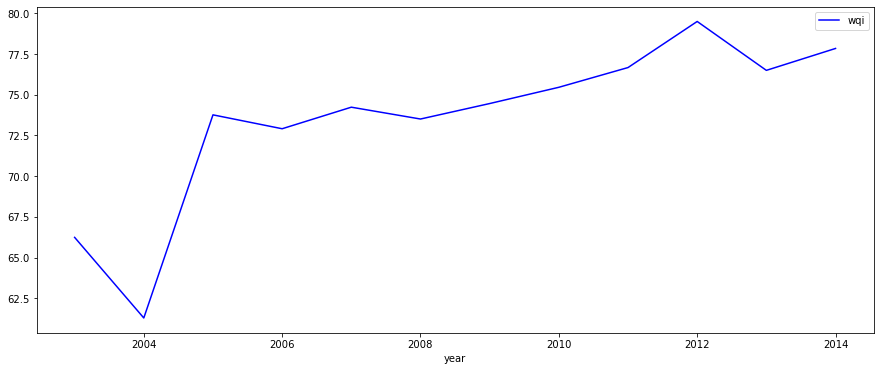

In [92]:
import matplotlib.pyplot as plt
data1=data1.set_index('year')
data1.plot(figsize=(15,6),color="blue")
plt.show()

<AxesSubplot:>

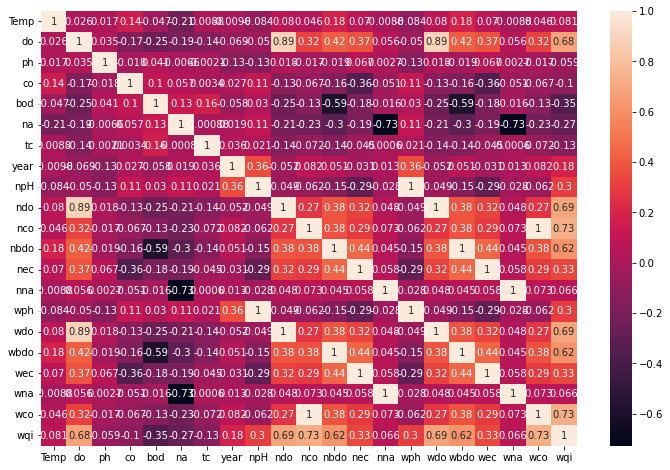

In [93]:
sns.heatmap(data.corr(),annot=True)

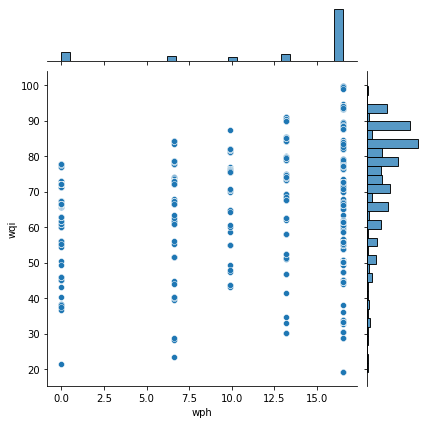

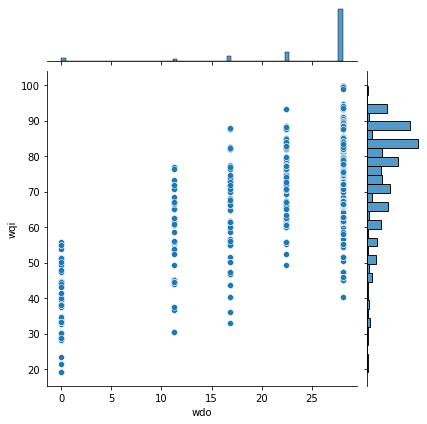

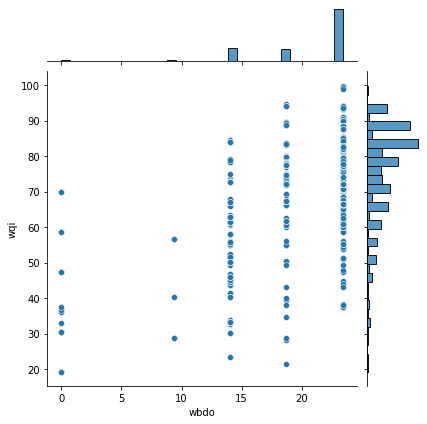

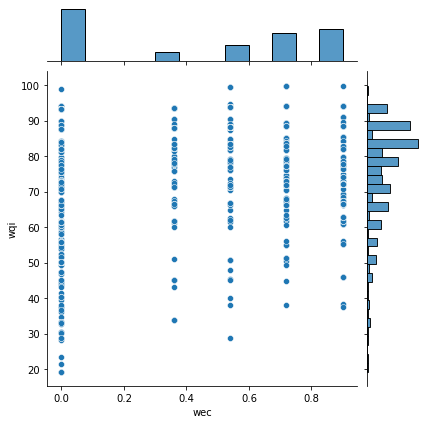

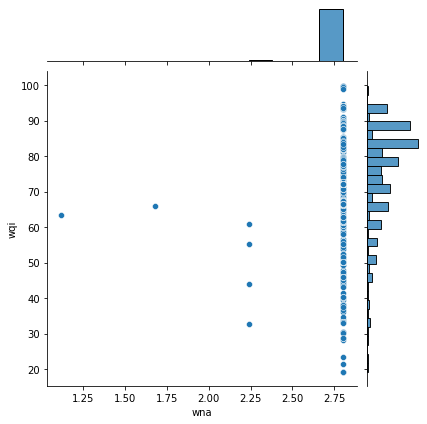

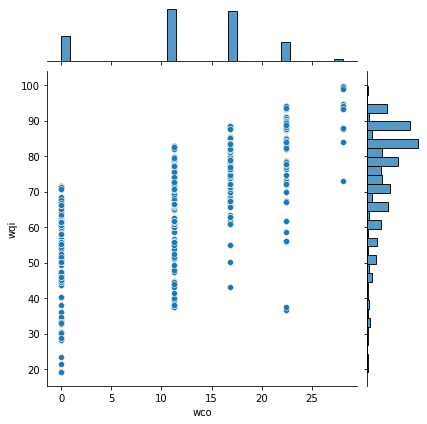

In [94]:
#joint plot
for col1 in ['wph','wdo','wbdo','wec','wna','wco']:
    for col2 in ['wqi']:
        sns.jointplot(x=data[col1],y=data[col2])
        plt.show()

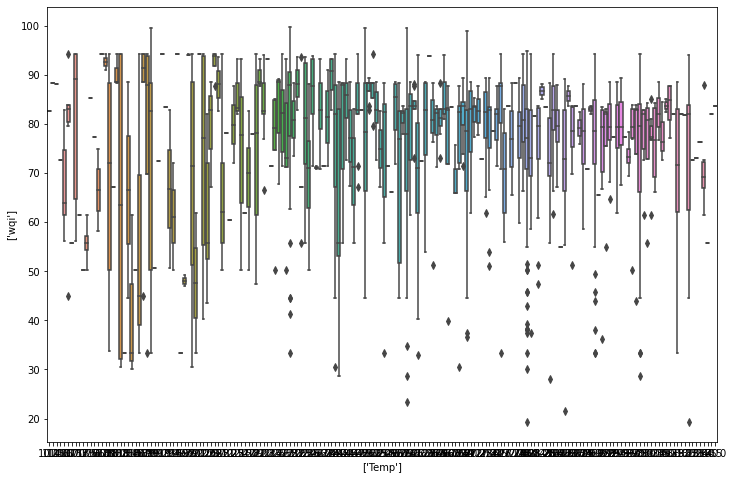

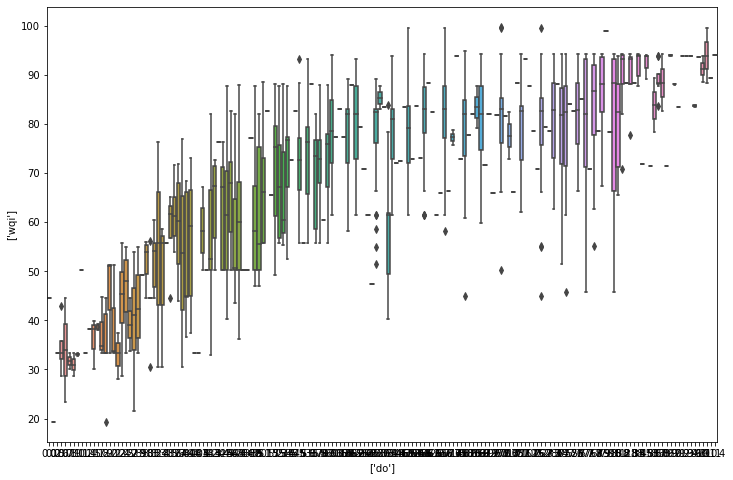

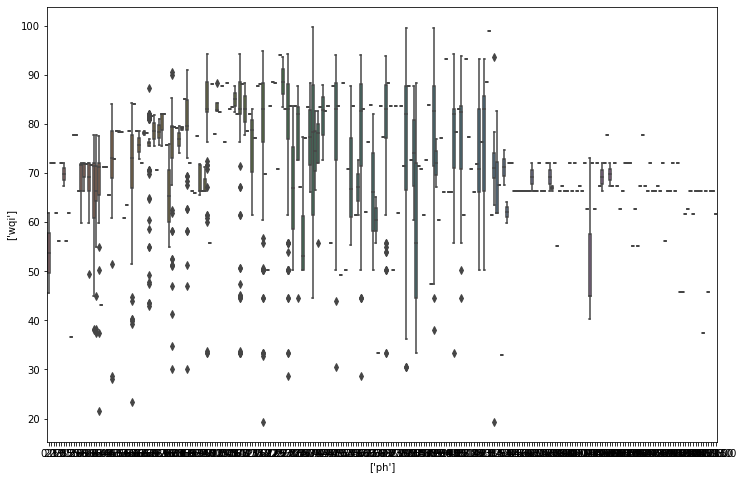

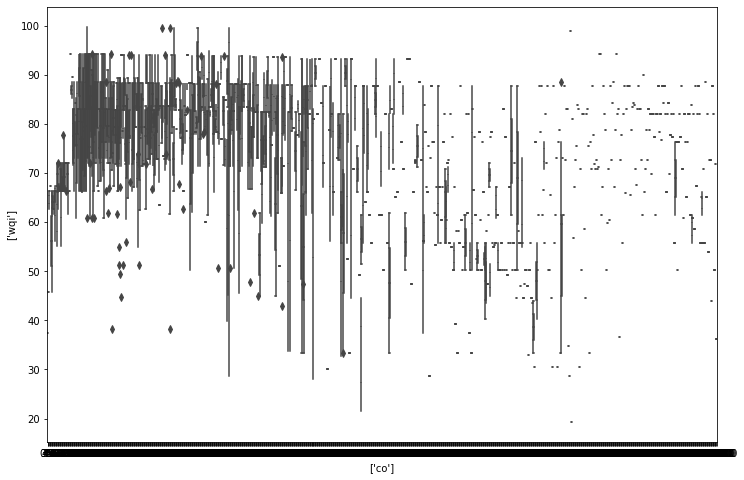

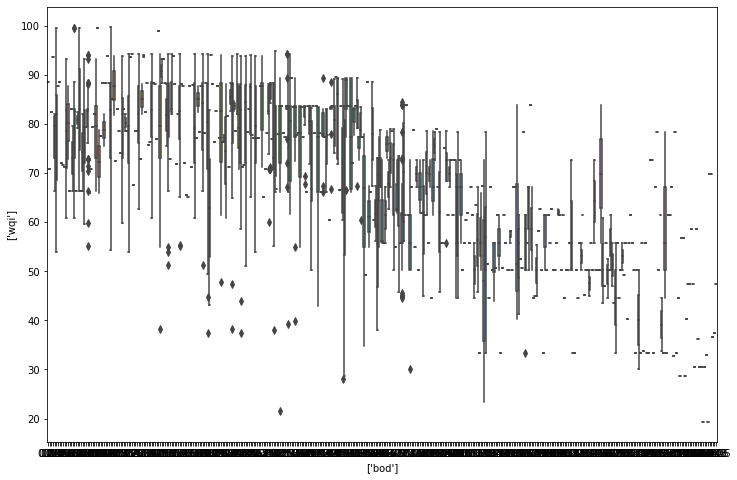

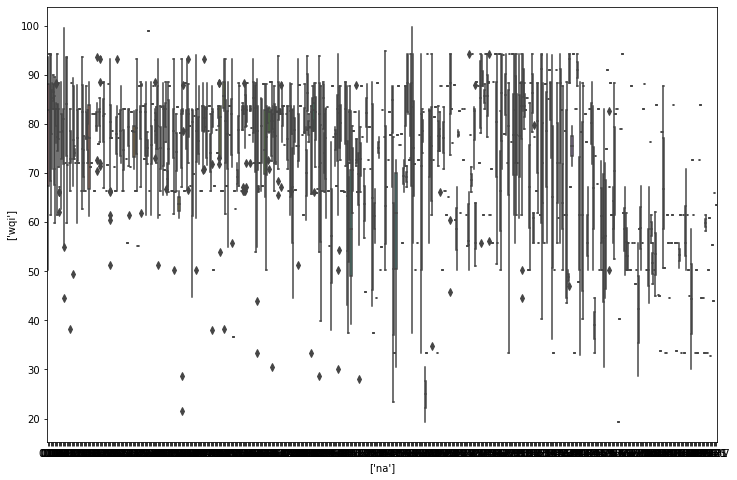

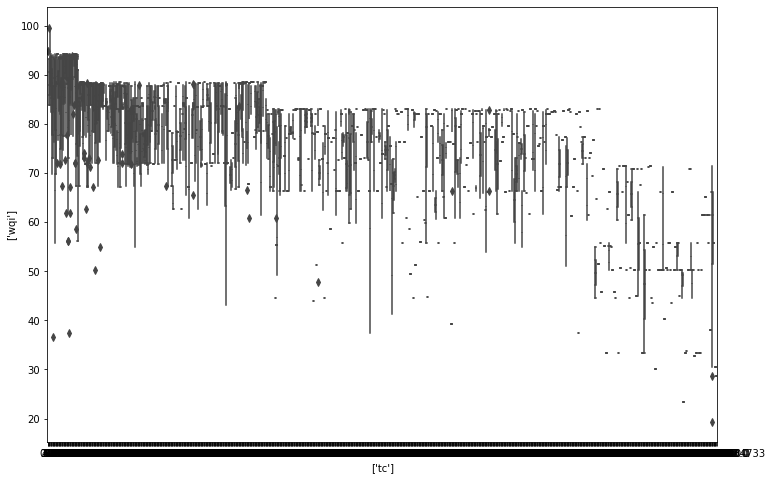

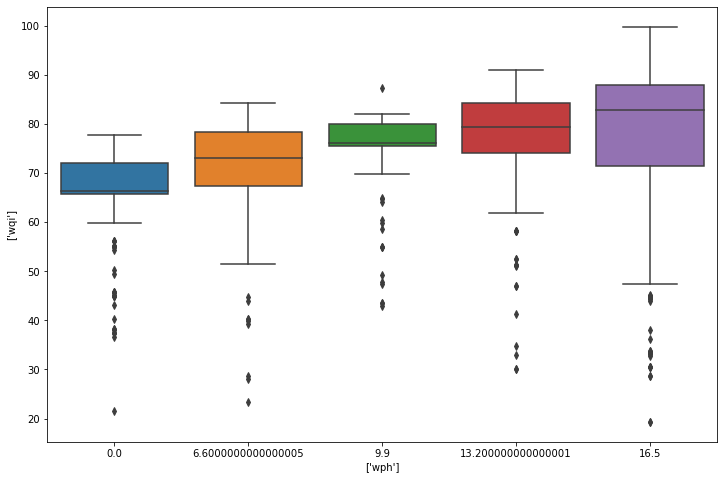

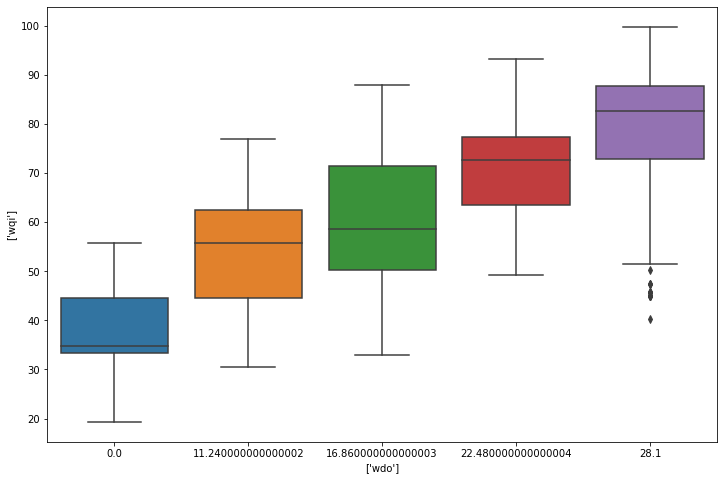

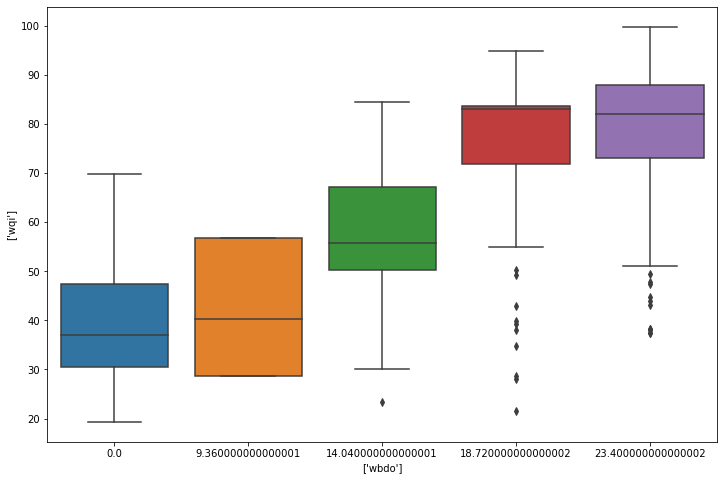

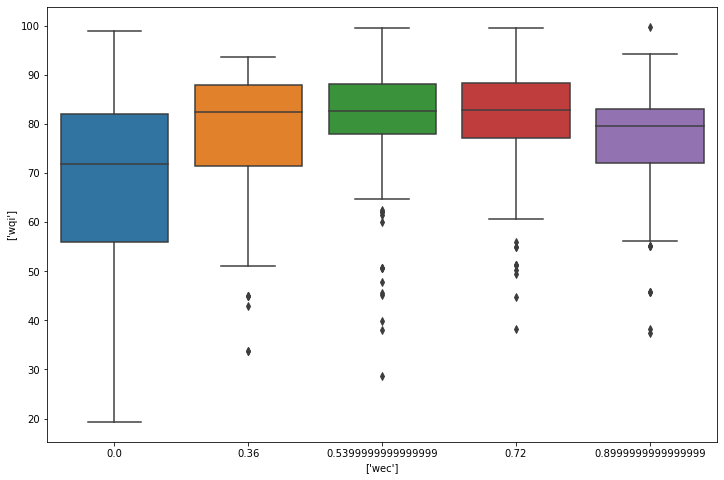

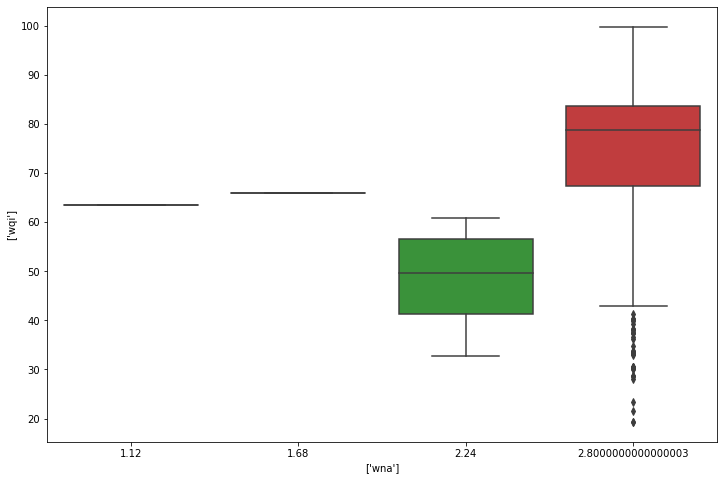

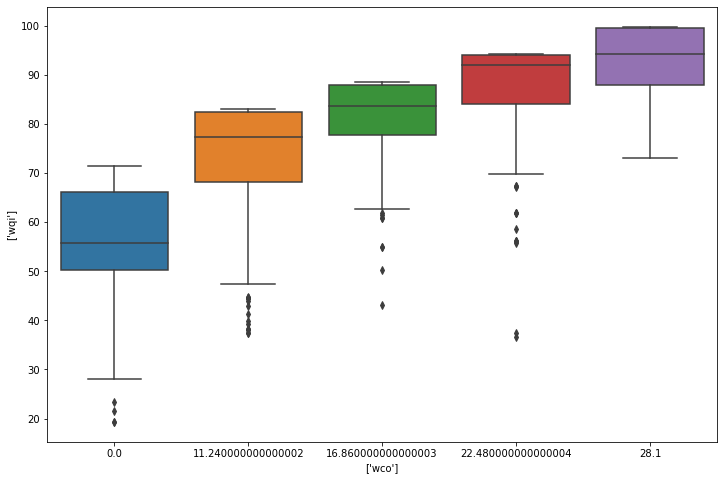

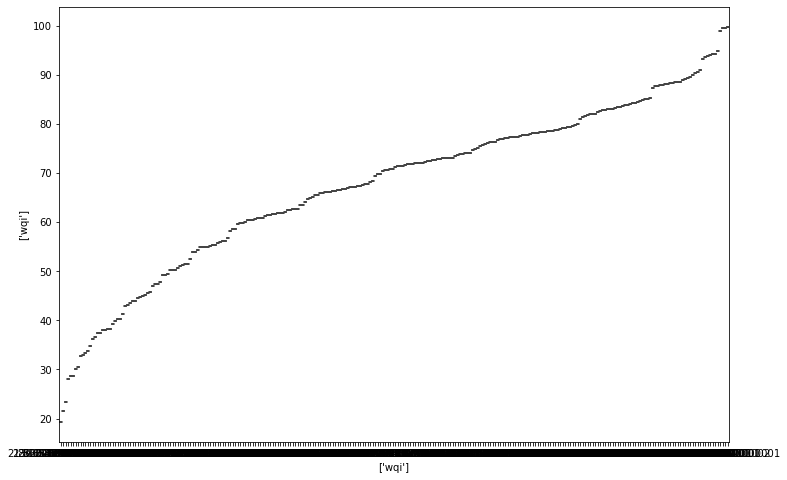

In [95]:
#box plot
for col1 in data.columns:
    if data.dtypes[col1]=='float64':
        for col2 in ['wqi']:
            if data.dtypes[col2]=='float64':
                sns.boxplot(x=data[col1],y=data[col2]).set(xlabel=[col1],ylabel=[col2])
                plt.show()

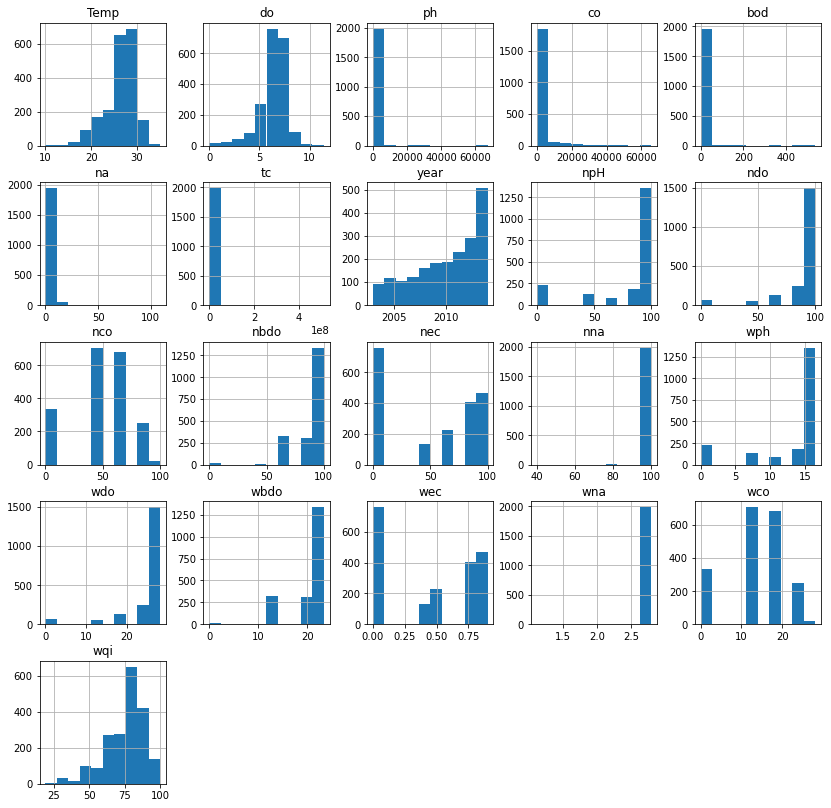

In [96]:
data.hist(figsize=(14,14))
plt.show()

# Handling missing values

In [97]:
df=data[["do","ph","co","bod","na","tc","wqi"]]
df

,do,ph,co,bod,na,tc,wqi
0,6.7,7.5,203.0,6.940049,0.100000,27.0,84.46
1,5.7,7.2,189.0,2.000000,0.200000,8391.0,76.96
2,6.3,6.9,179.0,1.700000,0.100000,5330.0,79.28
3,5.8,6.9,64.0,3.800000,0.500000,8443.0,69.34
4,5.8,7.3,83.0,1.900000,0.400000,5500.0,77.14
...,...,...,...,...,...,...,...
1986,7.9,738.0,7.2,2.700000,0.518000,202.0,72.06
1987,7.5,585.0,6.3,2.600000,0.155000,315.0,72.06
1988,7.6,98.0,6.2,1.200000,1.623079,570.0,66.44
1989,7.7,91.0,6.5,1.300000,1.623079,562.0,66.44


In [98]:
df.isnull().sum()

do     0
ph     0
co     0
bod    0
na     0
tc     0
wqi    0
dtype: int64

In [99]:
df.dropna(axis=0,inplace=True)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [100]:
df.isnull().sum()

do     0
ph     0
co     0
bod    0
na     0
tc     0
wqi    0
dtype: int64

# spliiting dependent and independent column

In [172]:
x=data.iloc[:,0:7].values
x

array([[3.06000000e+01, 6.70000000e+00, 7.50000000e+00, ...,
        6.94004877e+00, 1.00000000e-01, 2.70000000e+01],
       [2.98000000e+01, 5.70000000e+00, 7.20000000e+00, ...,
        2.00000000e+00, 2.00000000e-01, 8.39100000e+03],
       [2.95000000e+01, 6.30000000e+00, 6.90000000e+00, ...,
        1.70000000e+00, 1.00000000e-01, 5.33000000e+03],
       ...,
       [2.80000000e+01, 7.60000000e+00, 9.80000000e+01, ...,
        1.20000000e+00, 1.62307871e+00, 5.70000000e+02],
       [2.80000000e+01, 7.70000000e+00, 9.10000000e+01, ...,
        1.30000000e+00, 1.62307871e+00, 5.62000000e+02],
       [2.90000000e+01, 7.60000000e+00, 1.10000000e+02, ...,
        1.10000000e+00, 1.62307871e+00, 5.46000000e+02]])

In [173]:
x.shape

(1991, 7)

In [174]:
y=data.iloc[:,-1:].values
y

array([[84.46],
       [76.96],
       [79.28],
       ...,
       [66.44],
       [66.44],
       [66.44]])

In [175]:
y.shape

(1991, 1)

# split the data into train and test

In [176]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train.shape

(1592, 7)

In [177]:
x_train

array([[2.100e+01, 5.500e+00, 7.400e+00, ..., 8.800e+00, 5.080e+00,
        5.500e+03],
       [3.000e+01, 8.100e+00, 5.690e+02, ..., 1.600e+00, 1.028e+00,
        6.050e+03],
       [2.800e+01, 6.300e+00, 7.580e+00, ..., 6.700e+00, 1.575e+00,
        4.963e+03],
       ...,
       [3.000e+01, 7.300e+00, 6.800e+00, ..., 1.200e+00, 1.200e-01,
        2.446e+03],
       [3.080e+01, 6.800e+00, 7.800e+00, ..., 1.900e+00, 6.700e-01,
        4.600e+02],
       [2.700e+01, 7.300e+00, 6.500e+00, ..., 5.000e-01, 2.100e-01,
        4.000e+02]])

In [178]:
x_test.shape

(399, 7)

In [179]:
y_train

array([[67.06],
       [66.44],
       [72.68],
       ...,
       [79.64],
       [87.66],
       [78.66]])

In [180]:

y_test

array([[30.04],
       [77.36],
       [93.82],
       [88.2 ],
       [67.38],
       [93.82],
       [70.8 ],
       [82.76],
       [33.34],
       [88.02],
       [88.2 ],
       [82.94],
       [71.88],
       [79.64],
       [82.94],
       [81.78],
       [34.72],
       [71.16],
       [70.8 ],
       [72.68],
       [73.04],
       [36.52],
       [82.04],
       [82.58],
       [85.26],
       [33.34],
       [83.7 ],
       [61.44],
       [67.82],
       [88.2 ],
       [66.12],
       [77.36],
       [88.38],
       [50.2 ],
       [85.26],
       [72.06],
       [87.66],
       [87.66],
       [72.86],
       [84.36],
       [82.04],
       [78.66],
       [72.06],
       [43.02],
       [88.56],
       [71.34],
       [71.7 ],
       [94.  ],
       [66.44],
       [44.58],
       [71.74],
       [93.64],
       [55.82],
       [82.94],
       [76.42],
       [88.6 ],
       [82.04],
       [71.16],
       [78.66],
       [70.8 ],
       [83.52],
       [60.82],
       [

# Linear regression and Random Forest algorithm

In [184]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [185]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state =10)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=10)

In [186]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

# Model evaluation

In [187]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.0140200501253205
MSE: 5.786707157894741
RMSE: 2.405557556554143


In [188]:
#accuracy of the model
metrics.r2_score(y_test, y_pred)

0.9684566685516488

# Saving the model

In [189]:
import pickle
pickle.dump( RandomForestRegressor,open('wqi.pkl', 'wb'))
model = pickle.load(open('wqi.pkl','rb'))

In [190]:
from ibm_watson_machine_learning import APIClient

wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"2gRSZ8PyiQrNpt4Umg45lNy0hZsJCSM307rdS8eK1WaA"
    
}
client = APIClient(wml_credentials)

In [191]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
#         print(space)
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id']) 

In [192]:
space_uid = guid_from_space_name(client,'Models')
print("Spcae UID = "+ space_uid)

Spcae UID = a79815f7-252b-42ef-8416-27b126526d37


In [193]:
client.set.default_space(space_uid)

'SUCCESS'

In [194]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [195]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
#software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.6")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [200]:
model_details = client.repository.store_model(model=regressor,meta_props={
    client.repository.ModelMetaNames.NAME:"water_dataX",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0	",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id=client.repository.get_model_id(model_details)

In [197]:
model_id

'bbef1b6d-78e9-473d-a163-0690853cdef2'

In [198]:
x_train[0]

array([-1.5875999 , -0.684425  , -0.06140958, -0.20384397,  0.06998719,
        0.86213052, -0.042079  ])

In [201]:
regressor.predict([[-0.684425  , -0.06140958, -0.20384397,  0.06998719,  0.86213052,
       -0.042079,0.634234]])

array([52.178])